<a href="https://colab.research.google.com/github/harshita-vk/diabetes-detection-models/blob/main/diabetesdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
db=pd.read_csv('diabetes.csv')
print(db.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
print(db.shape)

(768, 9)


In [ ]:
X=db.drop("Outcome",axis=1)
Y=db['Outcome']
print(X.head())
print(Y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)


(614, 8)
(154, 8)


In [11]:
print("duplicates",db.duplicated().sum())

duplicates 0


In [12]:
mean=X_train.mean()
std=X_train.std()

print(mean)
print(std)



Pregnancies                   3.742671
Glucose                     120.855049
BloodPressure                69.415309
SkinThickness                20.399023
Insulin                      81.438111
BMI                          31.983388
DiabetesPedigreeFunction      0.469168
Age                          32.907166
dtype: float64
Pregnancies                   3.313264
Glucose                      32.035057
BloodPressure                18.512599
SkinThickness                15.433974
Insulin                     116.234835
BMI                           7.740625
DiabetesPedigreeFunction      0.336847
Age                          11.503437
dtype: float64


In [13]:
X_train_standardized=(X_train-mean)/std
X_test_standardized=(X_test-mean)/std



In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_standardized,Y_train)
y_pred=model.predict(X_test_standardized)

In [17]:
print(y_pred[:10])

[0 0 0 0 0 0 0 1 1 1]


In [19]:
print(Y_test[:10])

668    0
324    0
624    0
690    0
473    0
204    0
97     0
336    0
568    0
148    0
Name: Outcome, dtype: int64


In [21]:
results=pd.DataFrame({
    "actual":Y_test,
    "predicted":y_pred
})

print(results.head(10))

     actual  predicted
668       0          0
324       0          0
624       0          0
690       0          0
473       0          0
204       0          0
97        0          0
336       0          1
568       0          1
148       0          1


In [23]:
#evaluating the model
import numpy as np
Y_test_np=np.array(Y_test)
Y_pred_np=np.array(y_pred)
FP=0
FN=0
TP=0
TN=0

In [24]:
for i in range (len(Y_test_np)):
  actual=Y_test_np[i]
  predicted=Y_pred_np[i]

  if actual==0 and predicted==0:
    TN+=1
  elif actual==0 and predicted==1:
    FP+=1
  elif actual==1 and predicted==0:
    FN+=1
  elif actual==1 and predicted==1:
    TP+=1

In [26]:
confusion_matrix=np.array([[TN,FP],
                           [FN,TP]])
print("confusion matrix:")
print(confusion_matrix)

confusion matrix:
[[79 20]
 [18 37]]


In [28]:
#calculating accuracy

accuracy=(TP+TN)/(TP+FN+FP+TN)
print("accuracy:",accuracy)

accuracy: 0.7532467532467533


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve , roc_auc_score

In [29]:
y_prob=model.predict_proba(X_test_standardized)[:,1]

In [31]:
fpr,tpr,thresholds=roc_curve(Y_test,y_prob)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)
rf.fit(X_train_standardized,Y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [40]:
rf_prob=rf.predict_proba(X_test_standardized)[:,1]
rf_fpr,rf_tpr,rp_thresholds=roc_curve(Y_test,rf_prob)
auc_score=roc_auc_score(Y_test,rf_prob)
print(" random forest auc score:",auc_score)

 random forest auc score: 0.834159779614325


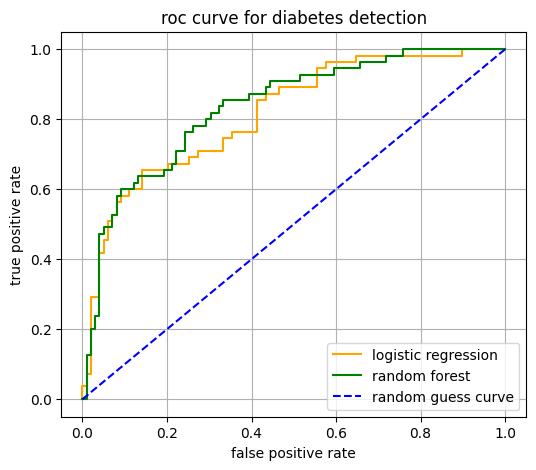

auc score: 0.8146923783287419


In [41]:
plt.figure(figsize=(6,5))
plt.plot(fpr,tpr,color="orange",label="logistic regression")
plt.plot(rf_fpr,rf_tpr,color="green",label="random forest")
plt.plot([0,1],[0,1],linestyle="--",color="blue",label="random guess curve")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("roc curve for diabetes detection")
plt.legend()
plt.grid()
plt.show()
auc_score=roc_auc_score(Y_test,y_prob)
print("auc score:",auc_score)